In [5]:
import keras

In [6]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, Input, Conv2D, MaxPool2D, Flatten

In [7]:
from keras.utils.np_utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.models import Model
import matplotlib.pyplot as plt

In [8]:
import cv2

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()

In [11]:
print (len(x_train[0][0]))

28


In [12]:
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

In [13]:
#x_train /=255
#x_test /= 255

In [140]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [111]:
K.clear_session()

In [112]:
#print (len(y_train))

In [113]:
#print (x_train[0])

In [114]:
inputs = Input(shape = (28,28,1))
conv1 = Conv2D(32,(5,5),activation='relu')(inputs)
pool1 = MaxPool2D(pool_size=(2,2))(conv1)
drop1 = Dropout(0.3)(pool1)
conv2 = Conv2D(64,(5,5),activation='relu')(drop1)
pool2 = MaxPool2D(pool_size=(2,2))(conv2)
drop2 = Dropout(0.3)(pool2)

flat = Flatten()(drop2)
fc = Dense(500,activation='relu')(flat)
digit = Dense(10,activation='softmax',name='digit')(fc)

model = Model(inputs = inputs, outputs = [digit])

In [115]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
__________

In [116]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [118]:
img_train = x_train.reshape(-1,28,28,1)
img_train = img_train.astype('float32')/255

In [119]:
print (len(img_train))
print (len(y_train))

60000
60000


In [120]:
h = model.fit(img_train, y_train, batch_size = 8, epochs=10,callbacks=[EarlyStopping(monitor='val_loss',patience=3)],validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 12534s 232ms/step - loss: 0.1354 - acc: 0.9564 - val_loss: 0.0342 - val_acc: 0.9895
Epoch 2/10
54000/54000 [==============================] - 138s 3ms/step - loss: 0.0651 - acc: 0.9808 - val_loss: 0.0319 - val_acc: 0.9910
Epoch 3/10
54000/54000 [==============================] - 130s 2ms/step - loss: 0.0551 - acc: 0.9837 - val_loss: 0.0307 - val_acc: 0.9902
Epoch 4/10
54000/54000 [==============================] - 131s 2ms/step - loss: 0.0513 - acc: 0.9855 - val_loss: 0.0280 - val_acc: 0.9917
Epoch 5/10
54000/54000 [==============================] - 133s 2ms/step - loss: 0.0448 - acc: 0.9864 - val_loss: 0.0289 - val_acc: 0.9923
Epoch 6/10
54000/54000 [==============================] - 137s 3ms/step - loss: 0.0432 - acc: 0.9879 - val_loss: 0.0282 - val_acc: 0.9923
Epoch 7/10
54000/54000 [==============================] - 143s 3ms/step - loss: 0.0418 - acc: 0.9879 - val_loss: 0.0295

In [121]:
model.save('sample.h5')

In [141]:
img_test = x_test.reshape(-1,28,28,1)
img_test = img_test.astype('float32')/255

In [142]:
result = model.evaluate(img_test, y_test)
#y_test = [to_categorical(y_test[:,i],num_classes=10) for i in range(7)]

10000/10000 [==============================] - 4s 415us/step


In [150]:
print (result)

[0.025386291538908517, 0.9931]


In [179]:
import numpy as np

In [167]:
print (preds[0])

[2.6442392e-19 1.4905251e-14 3.6313305e-10 1.7678578e-12 7.6393400e-20
 1.5194107e-17 1.9776639e-28 1.0000000e+00 4.9401910e-16 5.4450915e-13]


7


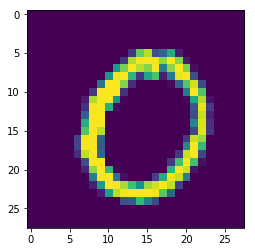

In [183]:
num = 101
plt.imshow(x_test2[num])

In [184]:
preds = np.array(model.predict(img_test))
preds = preds[num].argmax()
print (preds)

0
